## Initialize

### Packages

In [1]:
import numpy as np
import ROOT as root
import matplotlib
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


### Constants

In [2]:
mass_neutron = 0.93956542052
mass_proton  = 0.93827208816
mass_piminus = 0.13957039
mass_photon  = 0
RadToDeg = 180/np.pi

### Input

In [4]:
yield_file   = np.loadtxt("output/yield_count_data_piminus_p_2H.txt")
data_2H = np.zeros((4,9))
for i in range(4):
    for j in range(9):
        data_2H[i][j] = yield_file[j][i]
        
yield_file   = np.loadtxt("output/yield_count_sim_piminus_p_2H.txt")
sim_2H = np.zeros((4,9))
for i in range(4):
    for j in range(9):
        sim_2H[i][j] = yield_file[j][i]
        
yield_file   = np.loadtxt("output/yield_count_thrown_piminus_p_2H.txt")
thrown_2H = np.zeros((4,9))
for i in range(4):
    for j in range(9):
        thrown_2H[i][j] = yield_file[j][i]
        
yield_file   = np.loadtxt("output/yield_piminus_p_4He_data.txt")
data_4He = np.zeros((4,9))
for i in range(4):
    for j in range(9):
        data_4He[i][j] = yield_file[4*j+i][4]
        
yield_file   = np.loadtxt("output/yield_piminus_p_4He_sim.txt")
sim_4He = np.zeros((4,9))
for i in range(4):
    for j in range(9):
        sim_4He[i][j] = yield_file[4*j+i][4]
        
yield_file   = np.loadtxt("output/yield_piminus_p_4He_thrown.txt")
thrown_4He = np.zeros((4,9))
for i in range(4):
    for j in range(9):
        thrown_4He[i][j] = yield_file[4*j+i][4]

## Cross section

In [7]:
lumi_2H = [[17.9571131-16.9930015, 16.9930015-16.2575655, 16.2575655-14.8389824, 14.8389824-12.7206057, 12.7206057-7.6440912, 7.6440912-5.3673892, 5.3673892-3.6303735, 3.6303735-1.8942208, 1.8942208-0.1602483],
           [17.9571131-16.9930015, 16.9930015-16.2575655, 16.2575655-14.8389824, 14.8389824-12.7206057, 12.7206057-7.6440912, 7.6440912-5.3673892, 5.3673892-3.6303735, 3.6303735-1.8942208, 1.8942208-0.1602483],
           [17.9571131-16.9930015, 16.9930015-16.2575655, 16.2575655-14.8389824, 14.8389824-12.7206057, 12.7206057-7.6440912, 7.6440912-5.3673892, 5.3673892-3.6303735, 3.6303735-1.8942208, 1.8942208-0.1602483],
           [17.9571131-16.9930015, 16.9930015-16.2575655, 16.2575655-14.8389824, 14.8389824-12.7206057, 12.7206057-7.6440912, 7.6440912-5.3673892, 5.3673892-3.6303735, 3.6303735-1.8942208, 1.8942208-0.1602483],
          ]
lumi_4He = [[16.7932198-15.8711959, 15.8711959-15.1619085, 15.1619085-13.7588243, 13.7588243-11.7019768, 11.7019768-7.0024135, 7.0024135-5.0391138, 5.0391138-3.3940079, 3.3940079-1.7592183, 1.7592183-0.1511590],
            [16.7932198-15.8711959, 15.8711959-15.1619085, 15.1619085-13.7588243, 13.7588243-11.7019768, 11.7019768-7.0024135, 7.0024135-5.0391138, 5.0391138-3.3940079, 3.3940079-1.7592183, 1.7592183-0.1511590],
            [16.7932198-15.8711959, 15.8711959-15.1619085, 15.1619085-13.7588243, 13.7588243-11.7019768, 11.7019768-7.0024135, 7.0024135-5.0391138, 5.0391138-3.3940079, 3.3940079-1.7592183, 1.7592183-0.1511590],
            [16.7932198-15.8711959, 15.8711959-15.1619085, 15.1619085-13.7588243, 13.7588243-11.7019768, 11.7019768-7.0024135, 7.0024135-5.0391138, 5.0391138-3.3940079, 3.3940079-1.7592183, 1.7592183-0.1511590],
           ]

In [8]:
cs_2H = data_2H*thrown_2H/sim_2H/lumi_2H
cs_4He = data_4He*thrown_4He/sim_4He/lumi_4He/2
transparency_4He = cs_4He/cs_2H*0.95
error_stat = np.sqrt((1/np.sqrt(data_2H))**2 + (1/np.sqrt(data_4He))**2)*transparency_4He
error_syst = 0.05*transparency_4He
error_total = np.sqrt(error_stat**2 + error_syst**2)

In [12]:
minus_t = np.zeros((4,9))

for i in range(4):
    theta = 22.5 + i*5
    for j in range(9):
        photon_energy = 6.25 + j*0.5
        energy_com = mass_neutron**2+2*mass_neutron*photon_energy

        pi_com = (energy_com*energy_com + mass_photon**4 + mass_neutron**4 - 2*mass_photon**2*mass_neutron**2 - 2*energy_com*mass_photon**2 - 2*energy_com*mass_neutron**2)/4/energy_com
        pi_com = np.sqrt(pi_com)
        pf_com = (energy_com*energy_com + mass_piminus**4 + mass_proton**4 - 2*mass_piminus**2*mass_proton**2 - 2*energy_com*mass_piminus**2 - 2*energy_com*mass_proton**2)/4/energy_com
        pf_com = np.sqrt(pf_com)
        
        BeamP4CM = root.TLorentzVector()
        BeamP4CM.SetXYZM(0, 0, pi_com, mass_photon)
        PiMinusP4CM = root.TLorentzVector()
        PiMinusP4CM.SetXYZM(0, pf_com*np.sin(theta/RadToDeg), pf_com*np.cos(theta/RadToDeg), mass_piminus)
        
        minus_t[i][j] = - (BeamP4CM - PiMinusP4CM).Mag2()

(0.3, 0.9)

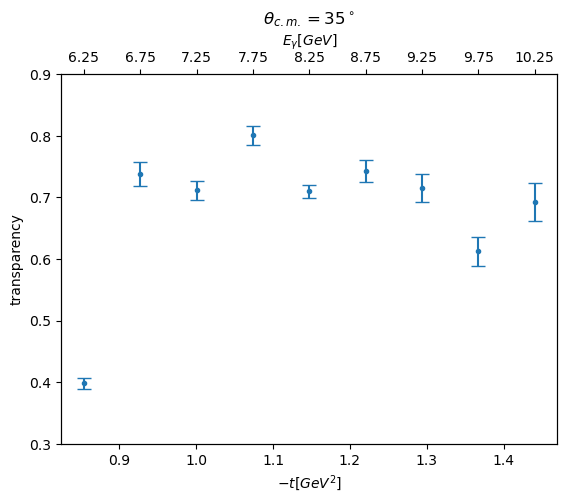

In [29]:
index = 2
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# ax1.errorbar(minus_t[1], transparency_4He[1], yerr=error_total[1], fmt='.', capsize=5, label='syst error')
ax1.errorbar(minus_t[index], transparency_4He[index], yerr=error_stat[index], fmt='.', capsize=5, label='stats error')
ax1.set_xlabel("$-t [GeV^2]$")
ax1.set_ylabel("transparency")
# ax1.legend()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(minus_t[index])
ax2.set_xticklabels(np.arange(6.25, 10.75, 0.5))
ax2.set_xlabel(r"$E_{\gamma} [GeV]$")

plt.title(r"$\theta_{c.m.} = 35 ^ \circ$")
plt.ylim(0.3, 0.9)

(0.3, 0.9)

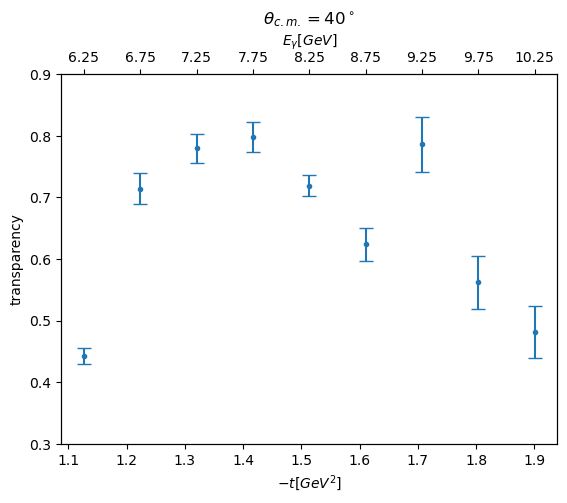

In [30]:
index = 3
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# ax1.errorbar(minus_t[1], transparency_4He[1], yerr=error_total[1], fmt='.', capsize=5, label='syst error')
ax1.errorbar(minus_t[index], transparency_4He[index], yerr=error_stat[index], fmt='.', capsize=5, label='stats error')
ax1.set_xlabel("$-t [GeV^2]$")
ax1.set_ylabel("transparency")
# ax1.legend()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(minus_t[index])
ax2.set_xticklabels(np.arange(6.25, 10.75, 0.5))
ax2.set_xlabel(r"$E_{\gamma} [GeV]$")

plt.title(r"$\theta_{c.m.} = 40 ^ \circ$")
plt.ylim(0.3, 0.9)

(0.0, 0.3)

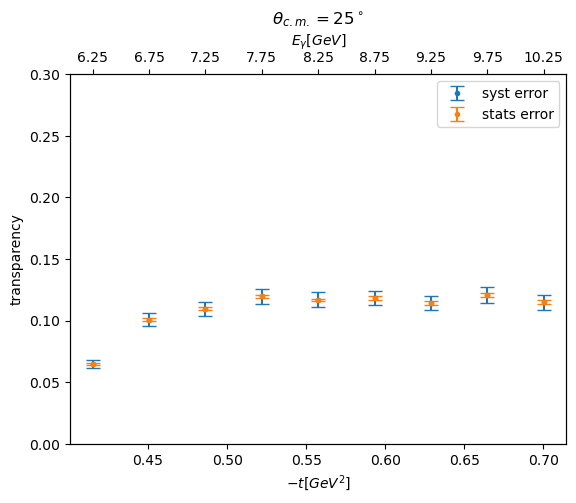

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.errorbar(minus_t[0], transparency_4He[0], yerr=error_total[0], fmt='.', capsize=5, label='syst error')
ax1.errorbar(minus_t[0], transparency_4He[0], yerr=error_stat[0], fmt='.', capsize=5, label='stats error')
ax1.set_xlabel("$-t [GeV^2]$")
ax1.set_ylabel("transparency")
ax1.legend()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(minus_t[0])
ax2.set_xticklabels(np.arange(6.25, 10.75, 0.5))
ax2.set_xlabel(r"$E_{\gamma} [GeV]$")

plt.title(r"$\theta_{c.m.} = 25 ^ \circ$")
plt.ylim(0, 0.3)

In [3]:
np.arange(0,1)

array([0])